In [1]:
#setup and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("📊 Nigerian Food Prices - Data Exploration")
print("=" * 50)

📊 Nigerian Food Prices - Data Exploration


In [11]:
#laad the dataset
def load_and_preview_data():
    """Load the dataset and provide initial preview"""
    try:
        df = pd.read_csv("../data/raw/nigerian_food_prices_2002_2025.csv", skiprows=[1])
        print(f"Dataset loaded sucessfully!")
        print(f"Shape: {df.shape}")
        print(f"Date range: {df['date'].min()} to {df['date'].max()}")

        return df
    except FileNotFoundError:
        print("❌ Dataset not found! Please ensure the file is in the correct location.")
        print("Expected path: ../data/raw/nigerian_food_prices_2002_2025.csv")
        return None
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

df = load_and_preview_data()

Dataset loaded sucessfully!
Shape: (60565, 16)
Date range: 2002-01-15 to 2025-05-15


In [12]:
#basic dataset information
if df is not None:
    print("\n DATASET OVERVIEW")
    print("=" * 30)

    print(f"Number of rows: {df.shape[0]:,}")
    print(f"Number of columns: {df.shape[1]}")

    print(f"\n COLUMN INFORMATION:")
    for i, col in enumerate(df.columns, 1):
        dtype = df[col].dtype
        null_count = df[col].isnull().sum()
        null_pct = (null_count / len(df)) * 100
        unique_count = df[col].nunique()

        print(f"{i:2}. {col:15} | {str(dtype):10} | Nulls: {null_count:6,} ({null_pct:5.1f}%) | Unique: {unique_count:6,}")


 DATASET OVERVIEW
Number of rows: 60,565
Number of columns: 16

 COLUMN INFORMATION:
 1. date            | object     | Nulls:      0 (  0.0%) | Unique:    281
 2. admin1          | object     | Nulls:      0 (  0.0%) | Unique:     14
 3. admin2          | object     | Nulls:      0 (  0.0%) | Unique:     43
 4. market          | object     | Nulls:      0 (  0.0%) | Unique:     60
 5. market_id       | int64      | Nulls:      0 (  0.0%) | Unique:     60
 6. latitude        | float64    | Nulls:      0 (  0.0%) | Unique:     50
 7. longitude       | float64    | Nulls:      0 (  0.0%) | Unique:     51
 8. category        | object     | Nulls:      0 (  0.0%) | Unique:      8
 9. commodity       | object     | Nulls:      0 (  0.0%) | Unique:     42
10. commodity_id    | int64      | Nulls:      0 (  0.0%) | Unique:     42
11. unit            | object     | Nulls:      0 (  0.0%) | Unique:     25
12. priceflag       | object     | Nulls:      0 (  0.0%) | Unique:      3
13. pricetype 

In [13]:
#display first few rows
if df is not None:
    print("\n FIRST 5 ROWS:")
    print("=" * 20)
    display(df.head())

    print("\n LAST 5 ROWS:")
    print("=" * 20)
    display(df.tail())


 FIRST 5 ROWS:


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,2002-01-15,Katsina,Jibia,Jibia (CBM),1038,13.08,7.24,cereals and tubers,Maize,51,KG,actual,Wholesale,NGN,175.92,1.54
1,2002-01-15,Katsina,Jibia,Jibia (CBM),1038,13.08,7.24,cereals and tubers,Millet,73,KG,actual,Wholesale,NGN,150.18,1.31
2,2002-01-15,Katsina,Jibia,Jibia (CBM),1038,13.08,7.24,cereals and tubers,Rice (imported),64,KG,actual,Wholesale,NGN,358.70,3.14
3,2002-01-15,Katsina,Jibia,Jibia (CBM),1038,13.08,7.24,cereals and tubers,Sorghum,65,KG,actual,Wholesale,NGN,155.61,1.36
4,2002-01-15,Sokoto,Gada,Illela (CBM),1037,13.64,5.28,cereals and tubers,Maize,51,KG,actual,Wholesale,NGN,153.35,1.34



 LAST 5 ROWS:


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
60560,2025-05-15,Borno,Mobbar,Damassack (CBM),1040,13.01,12.56,pulses and nuts,Groundnuts,153,2.5 KG,aggregate,Retail,NGN,4000.0,2.500
60561,2025-05-15,Borno,Mobbar,Damassack (CBM),1040,13.01,12.56,vegetables and fruits,Bananas,254,1.3 KG,aggregate,Retail,NGN,725.0,0.450
60562,2025-05-15,Borno,Mobbar,Damassack (CBM),1040,13.01,12.56,vegetables and fruits,Onions,173,0.5 KG,aggregate,Retail,NGN,200.0,0.120
60563,2025-05-15,Borno,Mobbar,Damassack (CBM),1040,13.01,12.56,vegetables and fruits,Oranges,360,400 G,aggregate,Retail,NGN,300.0,0.190
60564,2025-05-15,Borno,Mobbar,Damassack (CBM),1040,13.01,12.56,vegetables and fruits,Tomatoes,114,0.5 KG,aggregate,Retail,NGN,100.0,0.062


In [15]:
#date analysis
if df is not None:
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'])

    print("\n DATE ANALYSIS:")
    print("=" * 20)
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Time span: {(df['date'].max() - df['date'].min()).days} days")

    # Create year and month columns for analysis
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter

    # Records per year
    yearly_counts = df['year'].value_counts().sort_index()
    print(f"\nRecords per year:")
    print(yearly_counts)


 DATE ANALYSIS:
Date range: 2002-01-15 00:00:00 to 2025-05-15 00:00:00
Time span: 8521 days

Records per year:
year
2002      96
2003     134
2004      31
2005     150
2006      73
2007      59
2008     167
2009     143
2010     207
2011     194
2012     248
2013     326
2014    1171
2015    2383
2016    3312
2017    5696
2018    6270
2019    7077
2020    7608
2021    7923
2022    5796
2023    4776
2024    4750
2025    1975
Name: count, dtype: int64


In [21]:
#geographic coverage analysis
if df is not None:
    print("\n GEOGRAPHIC COVERAGE:")
    print("=" * 30)

    print(f"States (admin1): {df['admin1'].nunique()}")
    print(f"LGA (admin2): {df['admin2'].nunique()}")
    print(f"Markets: {df['market'].nunique()}")

    print(f"\nTop 10 States by Records:")
    state_counts = df['admin1'].value_counts().head(10)
    for state, count in state_counts.items():
        print(f" {state:20} : {count:6,} records")

    print(f"\nTop 10 Markets by Records:")
    market_counts = df['market'].value_counts().head(10)
    for market, count in market_counts.items():
        print(f"  {market:30} : {count:6,} records")


 GEOGRAPHIC COVERAGE:
States (admin1): 14
LGA (admin2): 43
Markets: 60

Top 10 States by Records:
 Borno                : 19,741 records
 Yobe                 : 19,145 records
 Kaduna               :  2,974 records
 Kano                 :  2,202 records
 Katsina              :  2,124 records
 Oyo                  :  2,093 records
 Zamfara              :  1,896 records
 Adamawa              :  1,895 records
 Kebbi                :  1,830 records
 Jigawa               :  1,799 records

Top 10 Markets by Records:
  Potiskum                       :  3,115 records
  Dawanau                        :  2,202 records
  Ibadan                         :  2,093 records
  Kaura Namoda                   :  1,896 records
  Maiduguri                      :  1,835 records
  Gwandu                         :  1,830 records
  Lagos                          :  1,716 records
  Budum                          :  1,671 records
  Gombe                          :  1,667 records
  Baga Road                      

In [25]:
#commodity analysis
if df is not None:
    print("\n COMMODITY ANALYSIS")
    print("=" * 25)

    print(f"Categories: {df['category'].nunique()}")
    print(f"Commodities: {df['commodity'].nunique()}")

    print(f"\n Categories:")
    category_counts = df['category'].value_counts()
    for category, count in category_counts.items():
        print(f"  {category:25} : {count:6,} records")

    print(f"\n Top 15 Commodities by Records:")
    commodity_counts = df['commodity'].value_counts().head(15)
    for commodity, count in commodity_counts.items():
        print(f"  {commodity:30} : {count:6,} records")


 COMMODITY ANALYSIS
Categories: 8
Commodities: 42

 Categories:
  cereals and tubers        : 28,767 records
  pulses and nuts           :  9,755 records
  vegetables and fruits     :  7,641 records
  meat, fish and eggs       :  5,093 records
  oil and fats              :  3,393 records
  non-food                  :  2,307 records
  miscellaneous food        :  2,241 records
  milk and dairy            :  1,368 records

 Top 15 Commodities by Records:
  Millet                         :  5,105 records
  Rice (imported)                :  3,035 records
  Rice (local)                   :  2,992 records
  Yam                            :  2,874 records
  Oil (palm)                     :  2,164 records
  Sorghum (white)                :  1,868 records
  Cowpeas (white)                :  1,801 records
  Maize (white)                  :  1,781 records
  Watermelons                    :  1,728 records
  Sorghum (brown)                :  1,644 records
  Gari (white)                   :  1,638 

In [27]:
#price analysis
if df is not None:
    print("\n PRICE ANALYSIS")
    print("=" * 20)

    # Basic price statistics
    print("NGN Prices")
    print(df['price'].describe())

    print("\nUSD Prices:")
    print(df['usdprice'].describe())

    # Check for price anomalies
    print(f"\n POTENTIAL ANOMALIES:")
    print(f"Zero prices (NGN): {(df['price'] == 0).sum():,}")
    print(f"Negative prices (NGN): {(df['price'] < 0).sum():,}")
    print(f"Zero prices (USD): {(df['usdprice'] == 0).sum():,}")
    print(f"Negative prices (USD): {(df['usdprice'] < 0).sum():,}")

    if 'priceflag' in df.columns:
        print(f"\n Price Flags:")
        flag_counts = df['priceflag'].value_counts()
        for flag, count in flag_counts.items():
            print(f"  {flag:15} : {count:6,} records")


 PRICE ANALYSIS
NGN Prices
count     60565.000000
mean       5129.834547
std       10501.506799
min           1.000000
25%         212.000000
50%         500.000000
75%        3945.000000
max      180000.000000
Name: price, dtype: float64

USD Prices:
count    60565.000000
mean        15.215395
std         30.655788
min          0.002300
25%          0.620000
50%          1.310000
75%          3.920000
max        363.820000
Name: usdprice, dtype: float64

 POTENTIAL ANOMALIES:
Zero prices (NGN): 0
Negative prices (NGN): 0
Zero prices (USD): 0
Negative prices (USD): 0

 Price Flags:
  actual          : 39,234 records
  aggregate       : 20,918 records
  actual,aggregate :    413 records


In [28]:
#missing data analysis
if df is not None:
    print("\n MISSING DATA ANALYSIS:")
    print("=" * 30)

    missing_data = df.isnull().sum()
    missing_pct = (missing_data / len(df)) * 100

    missing_df = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_pct
    }).sort_values('Missing_Count', ascending=False)

    print("Columns with missing data:")
    for col, row in missing_df[missing_df['Missing_Count'] > 0].iterrows():
        print(f"  {col:15} : {row['Missing_Count']:6,} ({row['Missing_Percentage']: 5.1f}%)")


 MISSING DATA ANALYSIS:
Columns with missing data:


In [30]:
#data quality checks
if df is not None:
    print("\n DATA QUALITY CHECKS:")
    print("=" * 30)
    
    # Coordinate checks
    if 'latitude' in df.columns and 'longitude' in df.columns:
        valid_coords = df[(df['latitude'].between(4, 14)) &
                        (df['longitude'].between(3, 15))]
        print(f"Valid coordinates (Nigeria bounds): {len(valid_coords):,}")

    # Currency consistency
    if 'currency' in df.columns:
        print(f"Currency values:")
        currency_counts = df['currency'].value_counts()
        for currency, count in currency_counts.items():
            print(f"  {currency} : {count:,} records")

    #Unit consistency  
    if 'unit' in df.columns:
        print(f"\nUnits:")
        unit_counts = df['unit'].value_counts().head(10)
        for unit, count in unit_counts.items():
            print(f"  {unit:15} : {count:6,} records")


 DATA QUALITY CHECKS:
Valid coordinates (Nigeria bounds): 60,565
Currency values:
  NGN : 60,565 records

Units:
  100 KG          : 12,106 records
  KG              : 11,968 records
  1.3 KG          :  4,327 records
  L               :  3,818 records
  2.5 KG          :  3,644 records
  1.4 KG          :  3,164 records
  1.2 KG          :  2,822 records
  400 G           :  2,109 records
  0.5 KG          :  1,980 records
  750 ML          :  1,833 records


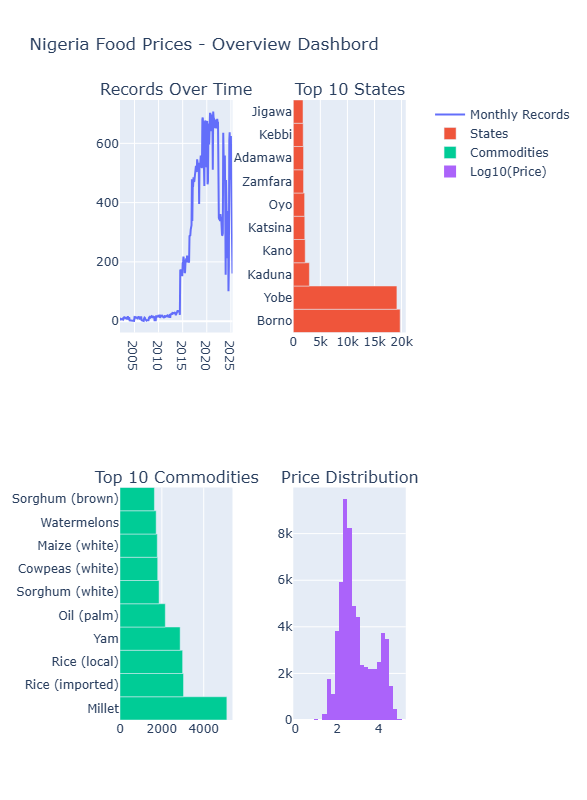

In [33]:
#Create Summary Visualizations
if df is not None:
    #records over time
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Records Over Time', 'Top 10 States',
                       'Top 10 Commodities', 'Price Distribution'),
        specs=[[{"secondary_y": True}, {}],
              [{}, {}]]
    )

    # Time series of records
    monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')
    monthly_counts['date'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))

    fig.add_trace(
        go.Scatter(x=monthly_counts['date'], y=monthly_counts['count'],
                  mode='lines', name='Monthly Records'),
        row=1, col=1
    )

    # Top states
    top_states = df['admin1'].value_counts().head(10)
    fig.add_trace(
        go.Bar(x=top_states.values, y=top_states.index, orientation='h',
              name='States'),
        row=1, col=2
    )

    # Top commodities
    top_commodities = df['commodity'].value_counts().head(10)
    fig.add_trace(
        go.Bar(x=top_commodities.values, y=top_commodities.index, orientation='h',
              name='Commodities'),
        row=2, col=1
    )

    #Price distribution (log scale due to wide range)
    fig.add_trace(
        go.Histogram(x=np.log10(df['price'][df['price'] > 0]),
                    nbinsx=50, name='Log10(Price)'),
        row=2, col=2
    )

    fig.update_layout(height=800, title_text="Nigeria Food Prices - Overview Dashbord")
    fig.show()

In [34]:
#Export Summary Statistics
if df is not None:
    summary_stats = {
        'total_records': len(df),
        'date_range': f"{df['date'].min()} to {df['date'].max()}",
        'states': df['admin1'].nunique(),
        'markets': df['market'].nunique(),
        'commodities': df['commodity'].nunique(),
        'avg_price_ngn': df['price'].mean(),
        'avg_price_usd': df['usdprice'].mean(),
        'missing_data_pct': (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
    }

    print("\n SUMMARY STATISTICS:")
    print("=" * 25)
    for key, value in summary_stats.items():
        print(f"{key:20} : {value}")
    pd.Series(summary_stats).to_json('../data/processed/summary_stats.json')

    print(f"\n Data exploration complete!")
    print(f"Dataset shape: {df.shape}")
    print(f"Ready for cleaning and analysis!")


 SUMMARY STATISTICS:
total_records        : 60565
date_range           : 2002-01-15 00:00:00 to 2025-05-15 00:00:00
states               : 14
markets              : 60
commodities          : 42
avg_price_ngn        : 5129.8345473458285
avg_price_usd        : 15.215394605795423
missing_data_pct     : 0.0

 Data exploration complete!
Dataset shape: (60565, 19)
Ready for cleaning and analysis!
